### Import

In [75]:
import os
import numpy as np
import sys
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import spectral.io.aviris as aviris
import matplotlib.tri as mtri
import matplotlib
import trimesh
import pyrender
import pickle
import numpy as np
import warnings
import open3d as o3d
import pywavefront

from stl import mesh
from tqdm import tqdm
from PIL import Image
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist
from scipy.spatial.distance import squareform
from scipy.stats import multivariate_normal as mnorm
from scipy import ndimage
from matplotlib import cm
from mpl_toolkits import mplot3d
from skimage import io, color
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial.transform import Rotation as rot
from sklearn.decomposition import PCA

### Parameters

In [76]:
no_components = 10

### Fonts

In [77]:
csfont = {'fontname':'Georgia'}
hfont = {'fontname':'Helvetica'}

### Read Pickle file

In [78]:
X = pickle.load(open("../../data/facegen/pickle/save.p","rb"))
XV = X['XV']
models = X['models']

### Setup and Run PCA

In [155]:
pca = PCA(n_components=no_components)
C = pca.fit_transform(XV.T)
C = C.T

### Log of Explained variance 

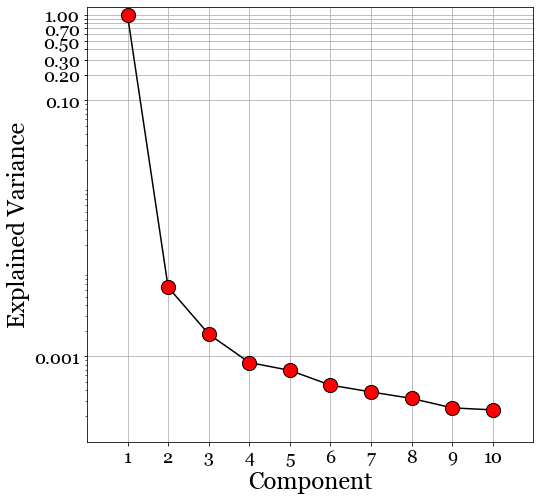

In [156]:
xticks = np.linspace(1,10,10)
yticks = np.linspace(0.0001,1,11,True)
ytickslabels = ['0.001','0.10','0.20','0.30','','0.50','','0.70','','','1.00']
plt.figure(figsize=(8,8))
ax = plt.subplot();
plt.plot(range(1,no_components+1),pca.explained_variance_ratio_,c='k');
plt.yscale('log');
plt.grid();
plt.scatter(xticks,pca.explained_variance_ratio_,c='r',edgecolor='k',s=200,zorder=100);
plt.xticks(xticks,labels=xticks.astype(int),**csfont,fontsize=18);
plt.yticks(yticks,labels=ytickslabels,rotation=0,**csfont,fontsize=18);
plt.axis((0,11,0.00001,1.25));
plt.ylabel('Explained Variance',**csfont,fontsize=24);
plt.xlabel('Component',**csfont,fontsize=24);
plt.savefig('../../assets/matplotlib/019_faces_texture_explained_variance.png',dpi=300,bbox_inches="tight")

### Reshape the components

In [189]:
CD = C.copy()
CD = np.reshape(CD,(no_components,int(C[0,:].shape[0]/3),3))

### Scale down the mean component

In [190]:
CD[0,:,:] = CD[0,:,:] * 0.002

### Mix together 2 opposites

In [204]:
value1 = 0.005
value2 = 0.005
CA = CD[0,:,:] + value1*CD[1,:,:] + value2*CD[2,:,:]
CB = CD[0,:,:]# + -value1*CD[1,:,:] + -value2*CD[2,:,:]

In [205]:
CA[100,:]
CB[100,:]

array([-0.40857788, -0.63296938, -0.77866915])

### Read/Write to OBJ file

In [206]:
mylines = []
indices = []
count = 0
with open('../../data/facegen/reference/reference.obj','r') as f:
    for line in f:
        line = line.rstrip()
        if ('v ' in line[:2]):
            indices.append(count)
        mylines.append(line)
        count = count + 1
count = 0
indexer = 1
indices = np.array(indices)
with open('../../data/facegen/reference/CA.obj','w') as f:
    for myline in mylines:
        if ('v ' in myline[:2]):
            new_vector = np.round(CA[indexer,:],4).astype(str)
            new_vector_str = 'v ' + ' '.join(new_vector)
            f.write(new_vector_str + '\n')
            indexer = indexer + 1
        else:
            f.write(myline + '\n')
        count = count + 1
count = 0
indexer = 1
indices = np.array(indices)
with open('../../data/facegen/reference/CB.obj','w') as f:
    for myline in mylines:
        if ('v ' in myline[:2]):
            new_vector = np.round(CB[indexer,:],4).astype(str)
            new_vector_str = 'v ' + ' '.join(new_vector)
            f.write(new_vector_str + '\n')
            indexer = indexer + 1
        else:
            f.write(myline + '\n')
        count = count + 1        